# Importing Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from pandas import read_csv
import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pyodbc
from datetime import timedelta,date

import xgboost as xgb
from xgboost import plot_importance, plot_tree
import time

In [2]:
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=CNQWSQLPDB01,1433;"
            "Database=sf_ismpali;"
            "UID=SmartFactory_Read;"
            "PWD=SweZU95xItiTREb652ri;")
cnxn = pyodbc.connect(cnxn_str)

In [3]:
cursor = cnxn.cursor()

In [4]:
df = pd.read_sql("SELECT * FROM CNQL6FZ01 Order by t_stamp ASC", cnxn)
df.head()
#df_fr = pd.read_sql("SELECT * FROM CNQL6FR01 Order by t_stamp ASC", cnxn)
#df_fr.head()

,cnql6fz01_ndx,ReturnAir_Temp,OffProduct_LL_Temp,OnProduct_ML_Temp,OnProduct_UL_Temp,CoilA_AirOff_RTD_Error,CoilA_AirOff_Temp,CoilA_AirOn_RTD_Error,CoilA_AirOn_Temp,CoilA_Defrost,...,Alm_Estop_OutFeed,Alm_ProdHeight_Intern,BeltRunning,CIP_Enabled,CIP_Running,DrumDrive_Status,DrumDrives_Running,EStopOK,CIP_Status,t_stamp
0,101,-17.002029,-29.966747,-28.028168,-30.844604,0.0,-27.0,0.0,-15.0,0.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,2023-04-13 10:52:53.957
1,102,-17.295574,-29.930183,-28.064732,-30.881168,0.0,-27.0,0.0,-15.0,0.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,2023-04-13 10:53:53.957
2,103,-17.405716,-29.930183,-28.064732,-30.881168,0.0,-27.0,0.0,-16.0,0.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,2023-04-13 10:54:53.960
3,104,-17.479092,-29.966747,-28.137917,-30.990948,0.0,-27.0,0.0,-16.0,0.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,2023-04-13 10:55:53.963
4,105,-17.515774,-29.966747,-28.211052,-31.027512,0.0,-27.0,0.0,-16.0,0.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,2023-04-13 10:56:53.963


In [6]:
df.to_csv('CNQL6FZ01_5-16.csv', index=False)

In [2]:
df = pd.read_csv('CNQL6FZ01_5_6_2023.csv')

In [3]:
df.t_stamp = pd.to_datetime(df.t_stamp)
ReturnAir_Temp_h = df.resample('H', on='t_stamp').ReturnAir_Temp.mean().rename('ReturnAir_Temp_h')
df = df.set_index('t_stamp')
df.drop(['cnql6fz01_ndx'],axis = 1, inplace = True)
df = pd.merge_asof(df,ReturnAir_Temp_h,left_on=df.index, right_on=ReturnAir_Temp_h.index).set_index('key_0')
df.index.names = ['t_stamp']
df.index = pd.to_datetime(df.index)
df.head()

,ReturnAir_Temp,OffProduct_LL_Temp,OnProduct_ML_Temp,OnProduct_UL_Temp,CoilA_AirOff_RTD_Error,CoilA_AirOff_Temp,CoilA_AirOn_RTD_Error,CoilA_AirOn_Temp,CoilA_Defrost,CoilA_Suction_Temp,...,Alm_Estop_OutFeed,Alm_ProdHeight_Intern,BeltRunning,CIP_Enabled,CIP_Running,DrumDrive_Status,DrumDrives_Running,EStopOK,CIP_Status,ReturnAir_Temp_h
t_stamp,,,,,,,,,,,,,,,,,,,,,
2023-04-13 10:52:53.957,-17.002029,-29.966747,-28.028168,-30.844604,0.0,-27.0,0.0,-15.0,0.0,-45.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,-17.552483
2023-04-13 10:53:53.957,-17.295574,-29.930183,-28.064732,-30.881168,0.0,-27.0,0.0,-15.0,0.0,-45.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,-17.552483
2023-04-13 10:54:53.960,-17.405716,-29.930183,-28.064732,-30.881168,0.0,-27.0,0.0,-16.0,0.0,-45.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,-17.552483
2023-04-13 10:55:53.963,-17.479092,-29.966747,-28.137917,-30.990948,0.0,-27.0,0.0,-16.0,0.0,-45.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,-17.552483
2023-04-13 10:56:53.963,-17.515774,-29.966747,-28.211052,-31.027512,0.0,-27.0,0.0,-16.0,0.0,-46.0,...,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0,-17.552483


## Get weather

In [4]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Hourly,Daily
#https://dev.meteostat.net/formats.html#meteorological-data-units
#https://dev.meteostat.net/api/stations/hourly.html#endpoint

# Set time period
start = datetime(2023, 4, 13)
end = datetime(2023, 5, 8)

# Create Point
location = Point(36.31874, -94.1208)

# Get daily data for 2018
weather_hr = Hourly(location, start, end)
weather_hr = weather_hr.fetch()

weather_d = Daily(location, start, end)
weather_d = weather_d.fetch()

#Date and time statements follow the ISO 8601 standard 
#(e.g. 2016-12-31 for December 31st 2016 and 23:59:58 for 23 hours, 59 minutes, and 58 seconds). 
#The time zone used by Meteostat is Coordinated Universal Time (UTC).
#Coordinated Universal Time is 5 hours ahead of Central Time
weather_hr.index = weather_hr.index - timedelta(hours=5)
#data[data.index == '2023-04-27 14:00:00']

In [5]:
weather_hr = weather_hr[['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco']]
weather_d = weather_d[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]

In [6]:
weather_d.rename(columns={i:i+'_d' for i in weather_d.columns}, inplace=True)
weather_hr.rename(columns={i:i+'_hr' for i in weather_hr.columns}, inplace=True)

# Create 1 hr lag on weather data


In [7]:
# Create 1 hr lag on weather data
#weather_hr.index = weather_hr.index + timedelta(hours=1)

In [8]:
weather_hr

,temp_hr,dwpt_hr,rhum_hr,prcp_hr,wdir_hr,wspd_hr,pres_hr,coco_hr
time,,,,,,,,
2023-04-12 19:00:00,20.6,6.2,39.0,0.0,180.0,11.2,1014.2,1.0
2023-04-12 20:00:00,17.8,5.7,45.0,0.0,180.0,11.2,1014.4,1.0
2023-04-12 21:00:00,17.0,5.9,48.0,0.0,190.0,17.0,1015.0,1.0
2023-04-12 22:00:00,16.7,5.0,46.0,0.0,170.0,9.4,1014.0,1.0
2023-04-12 23:00:00,16.7,5.0,46.0,0.0,150.0,11.2,1013.6,1.0
...,...,...,...,...,...,...,...,...
2023-05-07 15:00:00,28.0,17.5,53.0,0.5,210.0,24.0,1013.0,17.0
2023-05-07 16:00:00,28.9,17.8,51.0,0.1,180.0,33.0,1011.0,17.0
2023-05-07 17:00:00,26.1,19.0,65.0,0.0,210.0,25.9,1011.0,3.0


# Visalization

In [9]:
### remove columns with std == 0 (not changing)
df = df.transpose()[(df.std()!=0)].transpose()

In [10]:
timeStart='07:30'
timeEnd='22:30'
df = df.between_time(timeStart, timeEnd)
df['date'] = df.index.date
df['dayOfWeek'] = df.index.dayofweek
df['timeOfDay'] = df.index.hour

df = df[(df.dayOfWeek != 6) & 
         (df.date != date(2023, 4, 17)) &
         (df.date != date(2023, 4, 22)) &
         (df.date != date(2023, 4, 29)) &
         (df.date < date(2023, 5, 6))]

In [11]:
weather_d.columns

Index(['tavg_d', 'tmin_d', 'tmax_d', 'prcp_d', 'wdir_d', 'wspd_d', 'pres_d'], dtype='object')

In [12]:
df = pd.merge_asof(df,weather_hr,left_on=df.index, right_on=weather_hr.index).set_index('key_0')
df = pd.merge_asof(df,weather_d,left_on=df.index, right_on=weather_d.index).set_index('key_0')
df.index.names = ['time']

In [13]:
df.head()

,ReturnAir_Temp,OffProduct_LL_Temp,OnProduct_ML_Temp,OnProduct_UL_Temp,CoilA_AirOff_Temp,CoilA_AirOn_Temp,CoilA_Defrost,CoilA_Suction_Temp,CoilB_AirOff_Temp,CoilB_AirOn_RTD_Error,...,wspd_hr,pres_hr,coco_hr,tavg_d,tmin_d,tmax_d,prcp_d,wdir_d,wspd_d,pres_d
time,,,,,,,,,,,,,,,,,,,,,
2023-04-13 10:52:53.957,-17.002029,-29.966747,-28.028168,-30.844604,-27.0,-15.0,0.0,-45.0,-29.0,0.0,...,9.4,1013.2,3.0,18.1,11.0,24.4,0.0,143.0,9.0,1011.0
2023-04-13 10:53:53.957,-17.295574,-29.930183,-28.064732,-30.881168,-27.0,-15.0,0.0,-45.0,-29.0,0.0,...,9.4,1013.2,3.0,18.1,11.0,24.4,0.0,143.0,9.0,1011.0
2023-04-13 10:54:53.960,-17.405716,-29.930183,-28.064732,-30.881168,-27.0,-16.0,0.0,-45.0,-29.0,0.0,...,9.4,1013.2,3.0,18.1,11.0,24.4,0.0,143.0,9.0,1011.0
2023-04-13 10:55:53.963,-17.479092,-29.966747,-28.137917,-30.990948,-27.0,-16.0,0.0,-45.0,-29.0,0.0,...,9.4,1013.2,3.0,18.1,11.0,24.4,0.0,143.0,9.0,1011.0
2023-04-13 10:56:53.963,-17.515774,-29.966747,-28.211052,-31.027512,-27.0,-16.0,0.0,-46.0,-29.0,0.0,...,9.4,1013.2,3.0,18.1,11.0,24.4,0.0,143.0,9.0,1011.0


In [14]:
df = df[['ReturnAir_Temp_h',
        'ReturnAir_Temp','CoilA_Defrost','CoilB_Defrost','CoilC_Defrost','CoilD_Defrost',
         'timeOfDay','date','dayOfWeek',
         'pres_hr',
        'rhum_hr',
         'temp_hr', 'dwpt_hr', 'prcp_hr', 'wdir_hr', 'wspd_hr', 'coco_hr',
         'tavg_d', 'tmin_d', 'tmax_d', 'prcp_d', 'wdir_d', 'wspd_d', 'pres_d']]
    
df['No_Defrost'] = np.where((df['CoilA_Defrost'] == 0.0)&
                            (df['CoilB_Defrost'] == 0.0)&
                            (df['CoilC_Defrost'] == 0.0)&
                            (df['CoilD_Defrost'] == 0.0), 1, 0)

In [15]:
def count_continuous_ones(arr):
    l = [0]*len(arr)
    count = 0
    for i in range(1,len(arr)):
        if arr[i-1] == 1 and arr[i] == 1:
            count += 1
            l[i] = count
        else:
            count = 0
            
    return l

In [16]:
def count_continuous_zeros(arr):
    l = []
    count = 0
    for i in range(1,len(arr)):
        if arr[i-1] == 0 and arr[i] == 0:
            count += 1
        elif arr[i-1] == 0 and arr[i] == 1:
            l.append(count)
            count = 0
            
    return l

In [17]:
def temp_at_defrost_begin(arr,arrtemp):
    l = [0]*len(arr)
    loc = 0
    for i in range(len(arr)):
        if arr[i] == 1 and i == 0:
            l[i] = arrtemp[i]
        elif arr[i-1] == 0 and arr[i] == 1:
            loc = i
            l[loc] = arrtemp[loc]
        elif arr[i-1] == 1 and arr[i] == 1:
            l[i] = l[loc]
        else:
            loc = 0
            
    return l

In [18]:
df.ReturnAir_Temp_at_Defrost_Begin = 0
ReturnAir_Temp_at_Defrost_BeginA = np.array(temp_at_defrost_begin(list(df.CoilA_Defrost),list(df.ReturnAir_Temp)))
ReturnAir_Temp_at_Defrost_BeginB = np.array(temp_at_defrost_begin(list(df.CoilB_Defrost),list(df.ReturnAir_Temp)))
ReturnAir_Temp_at_Defrost_BeginC = np.array(temp_at_defrost_begin(list(df.CoilC_Defrost),list(df.ReturnAir_Temp)))
ReturnAir_Temp_at_Defrost_BeginD = np.array(temp_at_defrost_begin(list(df.CoilD_Defrost),list(df.ReturnAir_Temp)))
ReturnAir_Temp_at_Defrost_BeginNo = np.array(temp_at_defrost_begin(list(df.No_Defrost),list(df.ReturnAir_Temp)))

In [19]:
df['ReturnAir_Temp_at_Defrost_Begin'] = ReturnAir_Temp_at_Defrost_BeginA+ReturnAir_Temp_at_Defrost_BeginB+ReturnAir_Temp_at_Defrost_BeginC+ReturnAir_Temp_at_Defrost_BeginD+ReturnAir_Temp_at_Defrost_BeginNo

In [20]:
df['ReturnAir_Temp_at_Defrost_Begin'] 

time
2023-04-13 10:52:53.957   -17.002029
2023-04-13 10:53:53.957   -17.002029
2023-04-13 10:54:53.960   -17.002029
2023-04-13 10:55:53.963   -17.002029
2023-04-13 10:56:53.963   -17.002029
                             ...    
2023-05-05 22:25:55.780   -17.038715
2023-05-05 22:26:55.780   -17.038715
2023-05-05 22:27:55.780   -17.038715
2023-05-05 22:28:55.783   -17.038715
2023-05-05 22:29:55.783   -17.038715
Name: ReturnAir_Temp_at_Defrost_Begin, Length: 16157, dtype: float64

In [21]:
df.CoilA_Defrost = count_continuous_ones(list(df.CoilA_Defrost))
df.CoilB_Defrost = count_continuous_ones(list(df.CoilB_Defrost))
df.CoilC_Defrost = count_continuous_ones(list(df.CoilC_Defrost))
df.CoilD_Defrost = count_continuous_ones(list(df.CoilD_Defrost))
df.No_Defrost = count_continuous_ones(list(df.No_Defrost))

In [22]:
CoilA_Defrost_interval = count_continuous_zeros(list(df.CoilA_Defrost))
CoilB_Defrost_interval = count_continuous_zeros(list(df.CoilB_Defrost))
CoilC_Defrost_interval = count_continuous_zeros(list(df.CoilC_Defrost))
CoilD_Defrost_interval = count_continuous_zeros(list(df.CoilD_Defrost))

In [23]:
np.mean(CoilA_Defrost_interval)

194.61428571428573

In [24]:
np.mean(CoilB_Defrost_interval)

284.42

In [25]:
np.mean(CoilC_Defrost_interval)

154.58333333333334

In [26]:
np.mean(CoilD_Defrost_interval)

283.34

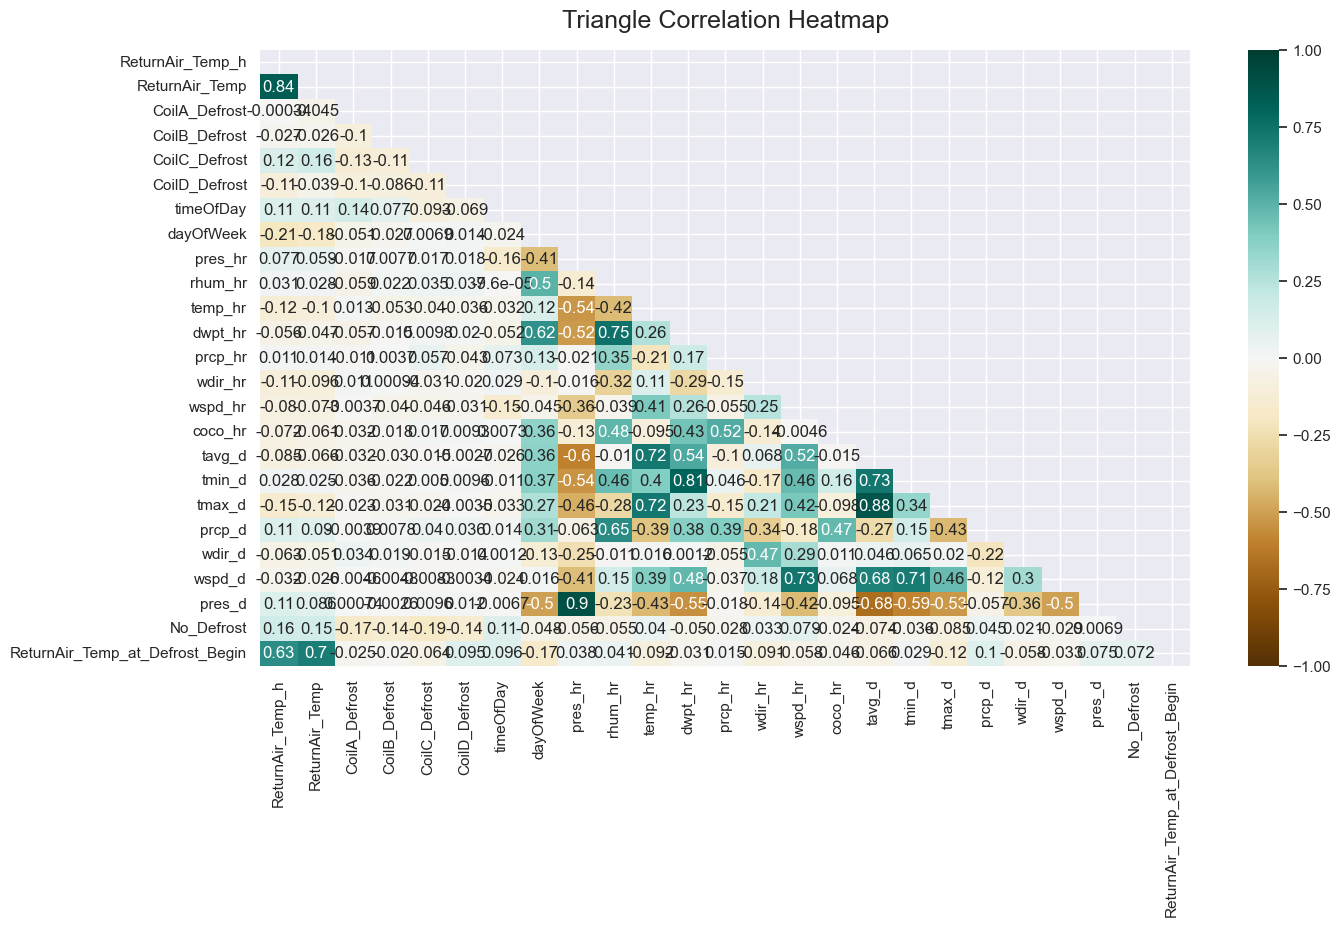

In [27]:
#Correlation Map for numeric variables:
#df = X_train_le
# define the mask to set the values in the upper triangle to True
sns.set(rc = {'figure.figsize':(15,8)})

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

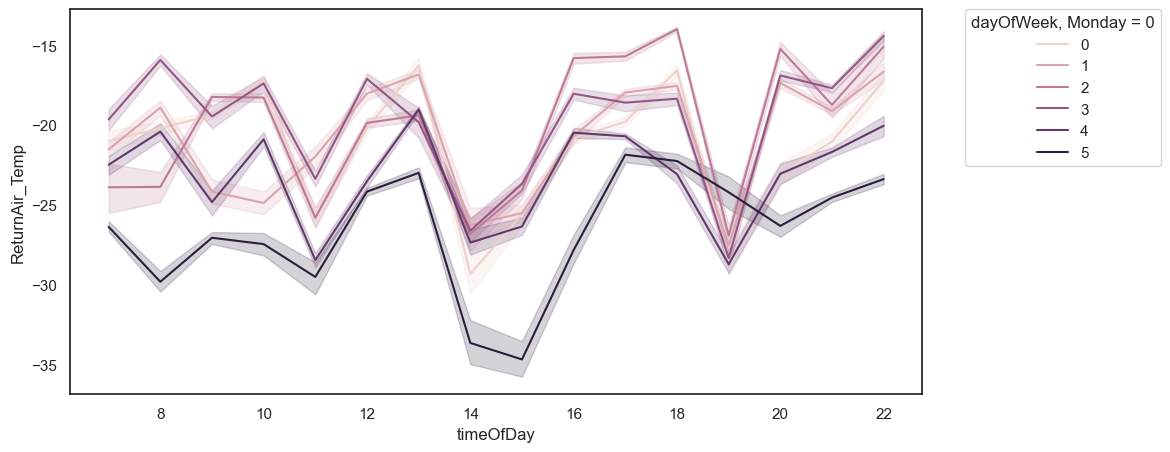

In [28]:
sns.set(rc={'figure.figsize':(11,5)})
sns.set_theme(style="white", palette=None)

sns.lineplot(data=df, x='timeOfDay', y="ReturnAir_Temp", hue="dayOfWeek")
plt.legend(bbox_to_anchor=(1.05, 1),  title = 'dayOfWeek, Monday = 0',loc=2, borderaxespad=0.)

In [29]:
df.columns

Index(['ReturnAir_Temp_h', 'ReturnAir_Temp', 'CoilA_Defrost', 'CoilB_Defrost',
       'CoilC_Defrost', 'CoilD_Defrost', 'timeOfDay', 'date', 'dayOfWeek',
       'pres_hr', 'rhum_hr', 'temp_hr', 'dwpt_hr', 'prcp_hr', 'wdir_hr',
       'wspd_hr', 'coco_hr', 'tavg_d', 'tmin_d', 'tmax_d', 'prcp_d', 'wdir_d',
       'wspd_d', 'pres_d', 'No_Defrost', 'ReturnAir_Temp_at_Defrost_Begin'],
      dtype='object')

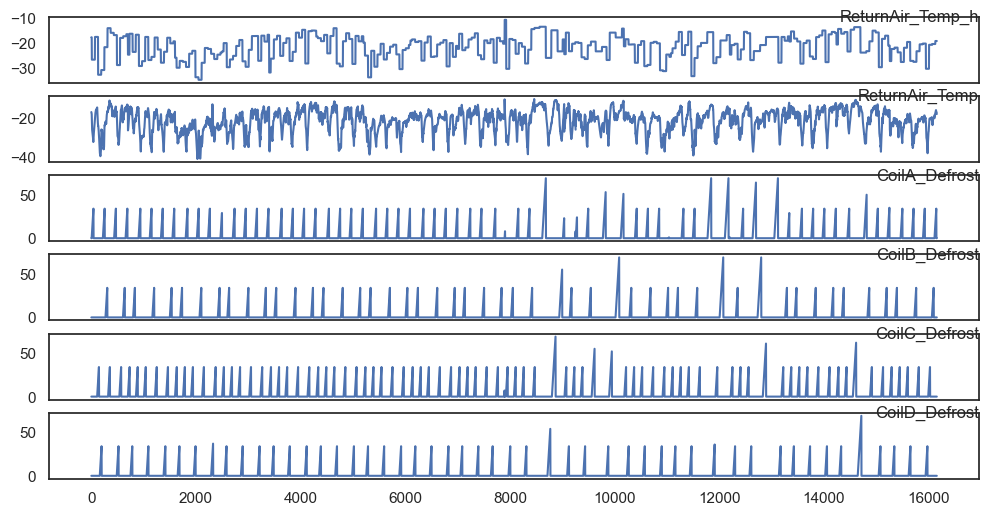

In [30]:
values = df.values
# specify columns to plot
#3,5
groups = [0,1,2,3,4,5]
i = 1
# plot each column
pyplot.figure(figsize=(12,6))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.8, loc='right',size = 12)
    i += 1

pyplot.show()

# df.columns

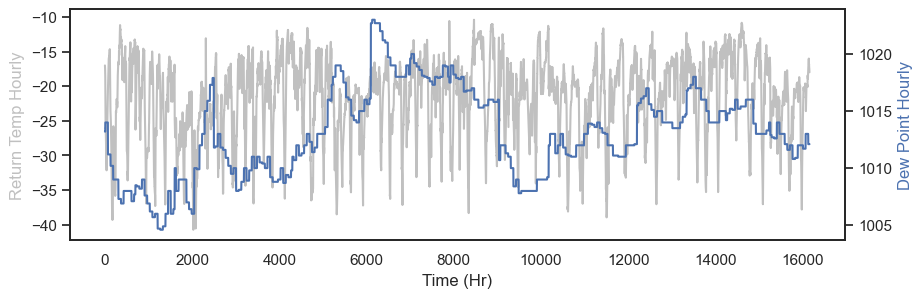

In [31]:

sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("white")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  

y1 = list(df["ReturnAir_Temp"])
y2 = list(df["pres_hr"])

        
ax1.plot(y1, 'silver')
ax2.plot(y2, 'b-')

ax1.set_xlabel('Time (Hr)')
ax1.set_ylabel('Return Temp Hourly', color='silver')
ax2.set_ylabel('Dew Point Hourly', color='b')

plt.show()


## Modeling/Data Prepare

In [32]:
df = df[[
        #'ReturnAir_Temp_h',
        'ReturnAir_Temp', 'CoilA_Defrost', 'CoilB_Defrost', 'CoilC_Defrost','CoilD_Defrost', 'No_Defrost',
       'ReturnAir_Temp_at_Defrost_Begin',
    'timeOfDay', 
    #'dayOfWeek', 
        #'Material',
        #
    'pres_hr',
    'rhum_hr',
       'temp_hr', 
    #'dwpt_hr',  
   'prcp_hr', 
    'wdir_hr', 'wspd_hr', 
        #'coco_hr', 
         #'tavg_d', 'tmin_d', 'tmax_d', 'prcp_d', 'wdir_d','wspd_d', 'pres_d', 
          
         
        ]]

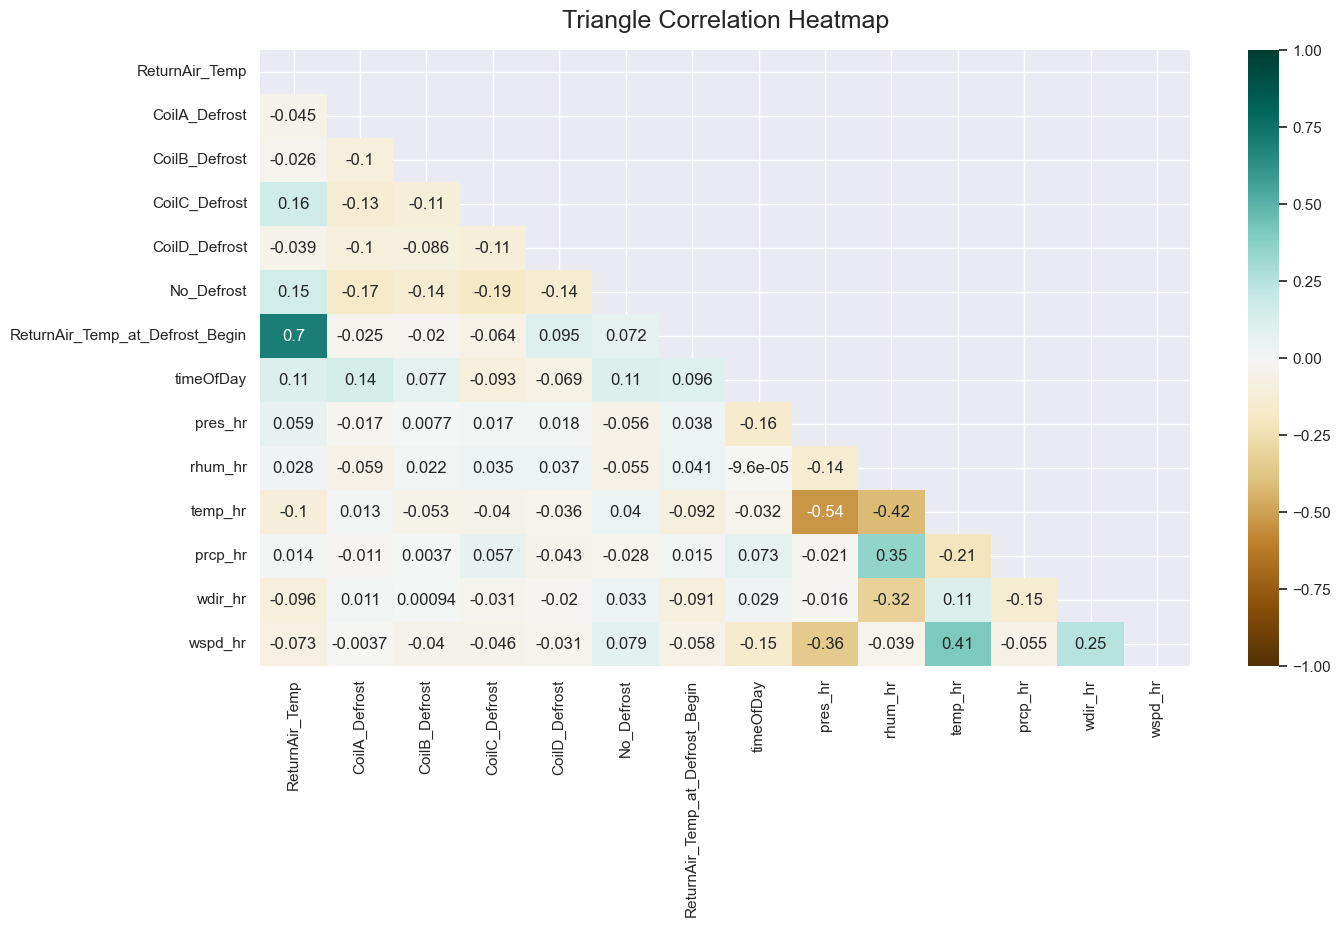

In [33]:
#Correlation Map for numeric variables:
#df = X_train_le
# define the mask to set the values in the upper triangle to True
sns.set(rc = {'figure.figsize':(15,8)})

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [34]:
df.dropna(inplace = True)

In [35]:
y = df['ReturnAir_Temp']
X = df.drop(columns=['ReturnAir_Temp'])

In [36]:
df.shape

(16156, 14)

In [37]:
#split the data based on the date
split_date="04-30-2023"
X_train=X.loc[X.index <=split_date].copy()
y_train=y.loc[y.index <=split_date].copy()
X_test=X.loc[X.index >split_date].copy()
y_test=y.loc[y.index >split_date].copy()

In [38]:
X_test_orig=X.loc[X.index >split_date].copy()

In [39]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
mm = MinMaxScaler()
X_train[X_train.columns] = mm.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = mm.transform(X_test[X_test.columns])

In [41]:
X_test.columns

Index(['CoilA_Defrost', 'CoilB_Defrost', 'CoilC_Defrost', 'CoilD_Defrost',
       'No_Defrost', 'ReturnAir_Temp_at_Defrost_Begin', 'timeOfDay', 'pres_hr',
       'rhum_hr', 'temp_hr', 'prcp_hr', 'wdir_hr', 'wspd_hr'],
      dtype='object')

## Hyper Para Tuning XGboost

In [42]:

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
#Import 'scope' from hyperopt in order to 
#obtain int values for certain hyperparameters.
from hyperopt.pyll.base import scope
hyperparameter_grid={'max_depth': scope.int(hp.quniform("max_depth", 1, 15, 1)),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'eta': hp.uniform('eta', 0,1),            
        'seed': 0
    }

In [43]:
def objective(space):
    model = xgb.XGBRegressor(**space, early_stopping_rounds=100,  eval_metric="rmse")
    #Define evaluation datasets.
    evaluation = [(X_train, y_train), (X_test, y_test)]
    #Fit the model. 
    model.fit(X_train, y_train,
            eval_set=evaluation,
            verbose=False)
    pred = model.predict(X_test)
    mse= mean_squared_error(y_test, pred)
    print ("SCORE:", mse)
    return {'loss':mse, 'status': STATUS_OK, 'model': model}

In [44]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = hyperparameter_grid,
                        algo = tpe.suggest,
                        max_evals = 25,
                        trials = trials)

[22:34:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


SCORE:                                                                          
14.855191750405917                                                              
[22:34:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an 

SCORE:                                                                          
15.156769365222738                                                              
[22:35:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


SCORE:                                                                          
10.098956569587811                                                              
[22:35:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by la

In [45]:
best_model = trials.results[np.argmin([r['loss'] for r in 
    trials.results])]['model']
lowest_loss = trials.results[np.argmin([r['loss'] for r in 
    trials.results])]['loss']
print(best_model, lowest_loss)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=100,
             enable_categorical=False, eta=0.06995670585304781,
             eval_metric='rmse', gamma=1.0629899329684296, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.069956705, max_delta_step=0, max_depth=5,
             min_child_weight=6.0, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=10, num_parallel_tree=1,
             predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.7747127161128343, scale_pos_weight=1, seed=0,
             subsample=1, tree_method='exact', ...) 8.268967875143577


In [46]:
xgb_tuned=xgb.XGBRegressor(
                    max_dept=int(best_hyperparams['max_depth']),
                    #colsample_bytree=best_hyperparams['colsample_bytree'],
                    objective='reg:squarederror',
                    tree_method='hist',
                    eval_metrics='rmse',
                    eta=best_hyperparams['eta'],
                    gamma=best_hyperparams['gamma'],
                    min_child_weight=best_hyperparams['min_child_weight'],
                    early_stopping_rounds=500,
                    n_estimators=1000,
)
xgb_tuned.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=50)

[22:35:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_metrics", "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:21.53987	validation_1-rmse:20.19672
[50]	validation_0-rmse:1.73854	validation_1-rmse:2.93957
[100]	validation_0-rmse:1.26404	validation_1-rmse:2.86092
[150]	validation_0-rmse:1.10675	validation_1-rmse:2.86412
[200]	validation_0-rmse:0.95387	validation_1-rmse:2.87961
[250]	validation_0-rmse:0.82904	validation_1-rmse:2.89407
[300]	validation_0-rmse:0.74241	validation_1-rmse:2.89903
[350]	validation_0-rmse:0.67835	validation_1-rmse:2.91065
[400]	validation_0-rmse:0.62522	validation_1-rmse:2.92320
[450]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=500,
             enable_categorical=False, eta=0.06995670585304781,
             eval_metrics='rmse', gamma=1.0629899329684296, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.069956705, max_delta_step=0, max_dept=5,
             max_depth=6, min_child_weight=6.0, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist', ...)

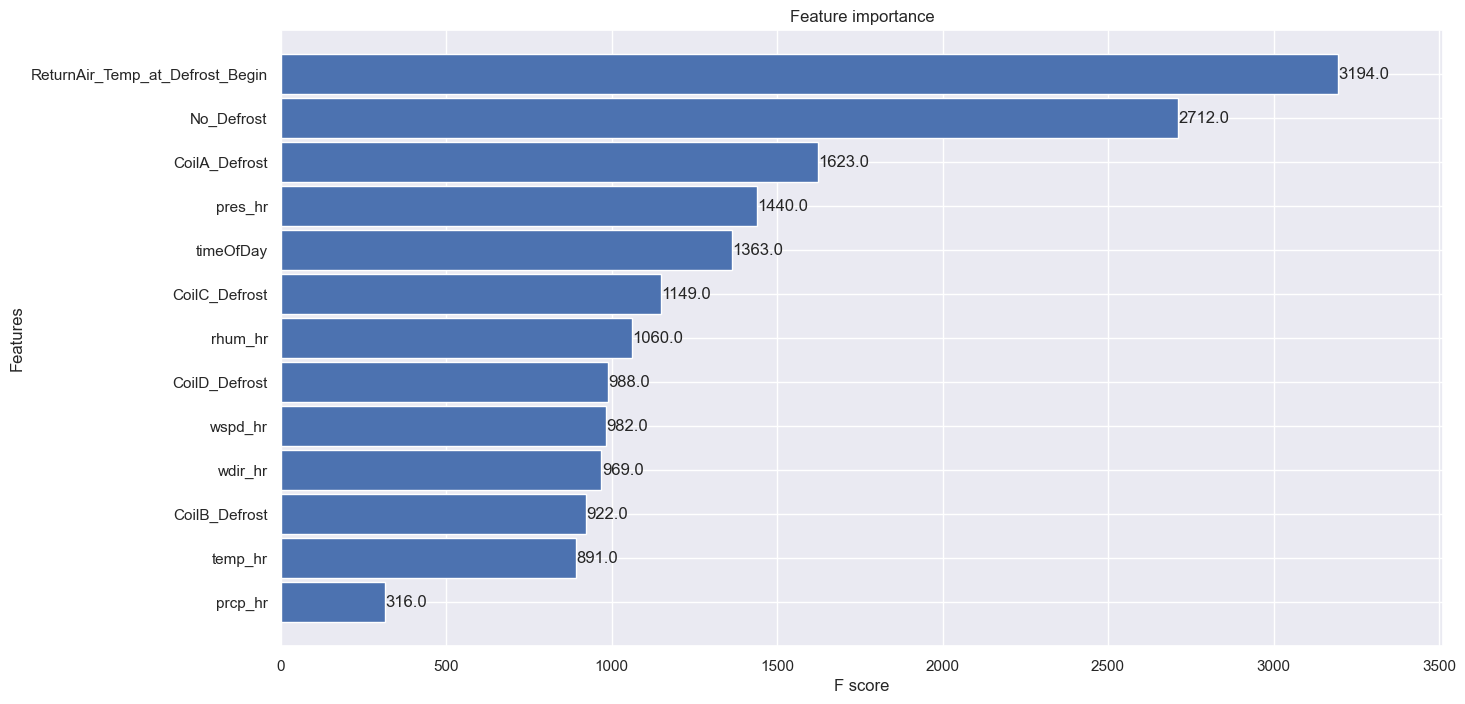

In [47]:
#clrs = ['red' if (x<288) and (x>100) else 'grey' for x in ]
_=plot_importance(xgb_tuned, height=0.9)

In [48]:
X_test

,CoilA_Defrost,CoilB_Defrost,CoilC_Defrost,CoilD_Defrost,No_Defrost,ReturnAir_Temp_at_Defrost_Begin,timeOfDay,pres_hr,rhum_hr,temp_hr,prcp_hr,wdir_hr,wspd_hr
time,,,,,,,,,,,,,
2023-05-01 07:30:44.873,0.0,0.0,0.000000,0.0,0.229299,0.327061,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:31:44.877,0.0,0.0,0.000000,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:32:44.880,0.0,0.0,0.014493,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:33:44.880,0.0,0.0,0.028986,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:34:44.880,0.0,0.0,0.043478,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05 22:25:55.780,0.0,0.0,0.000000,0.0,0.031847,0.545210,1.0,0.407609,0.910256,0.559809,0.0,0.333333,0.302326
2023-05-05 22:26:55.780,0.0,0.0,0.000000,0.0,0.038217,0.545210,1.0,0.407609,0.910256,0.559809,0.0,0.333333,0.302326
2023-05-05 22:27:55.780,0.0,0.0,0.000000,0.0,0.044586,0.545210,1.0,0.407609,0.910256,0.559809,0.0,0.333333,0.302326


In [49]:
#nodes:
len(('ReturnAir_Temp_at_Defrost_Begin','timeOfDay','pres_hr','dwpt_hr','temp_hr','wdir_hr','wspd_hr',\
     'CoilA_Defrost','CoilB_Defrost','CoilC_Defrost','CoilD_Defrost','No_Defrost'))

12

In [50]:
xgb_preds = xgb_tuned.predict(X_test)
xgb_score = mean_squared_error(y_test, xgb_preds, squared=False)
print('RMSE_Best_Model:', xgb_score)

RMSE_Best_Model: 2.9374440560710533


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, xgb_preds)

0.7053840273174818

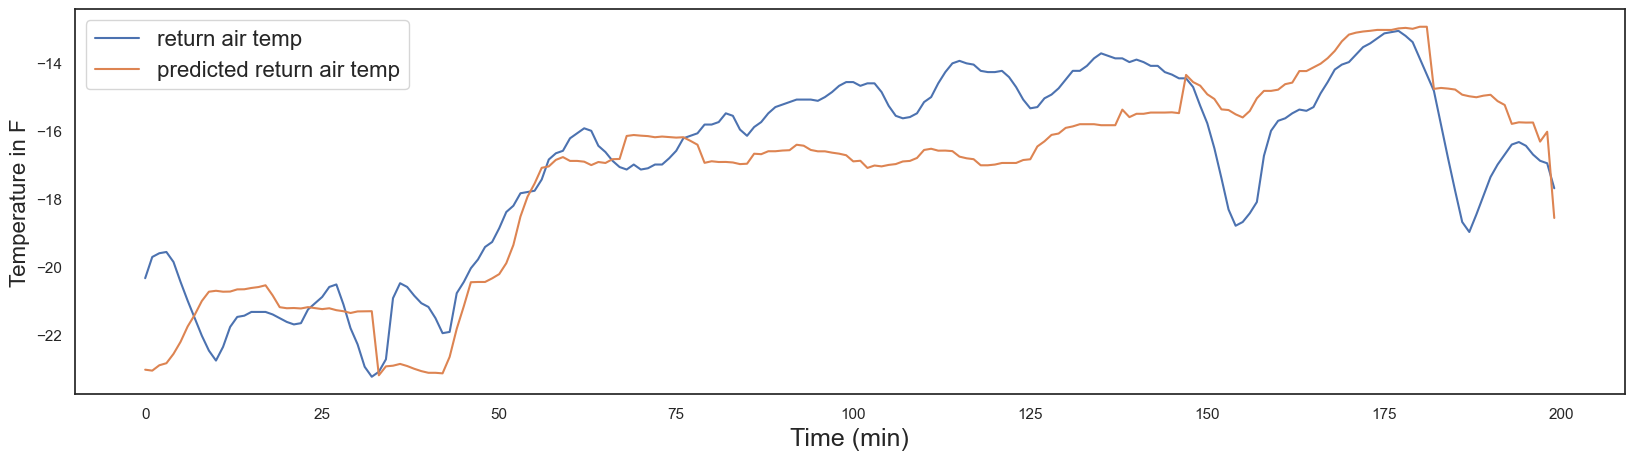

In [52]:
from random import randint
sns.set_style("white")
i = randint(0,len(y_test)-200)

pyplot.figure(figsize=(20,5))
pyplot.plot(list(y_test)[i:i+200], label='return air temp')
pyplot.plot(xgb_preds[i:i+200], label='predicted return air temp')
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Temperature in F', fontsize=16)
plt.rc('legend', fontsize = 16)
pyplot.legend()
pyplot.show()

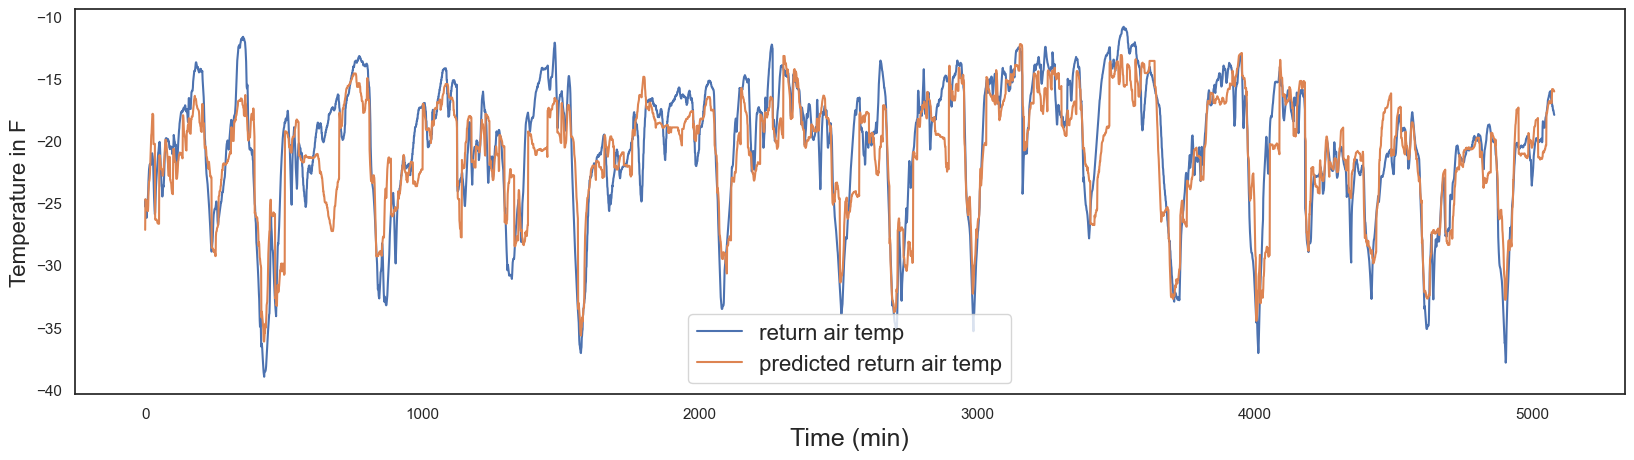

In [53]:
from random import randint
sns.set_style("white")

pyplot.figure(figsize=(20,5))
pyplot.plot(list(y_test)[0:-1], label='return air temp')
pyplot.plot(xgb_preds[0:-1], label='predicted return air temp')
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Temperature in F', fontsize=16)
plt.rc('legend', fontsize = 16)
pyplot.legend()
pyplot.show()

In [54]:
X_test

,CoilA_Defrost,CoilB_Defrost,CoilC_Defrost,CoilD_Defrost,No_Defrost,ReturnAir_Temp_at_Defrost_Begin,timeOfDay,pres_hr,rhum_hr,temp_hr,prcp_hr,wdir_hr,wspd_hr
time,,,,,,,,,,,,,
2023-05-01 07:30:44.873,0.0,0.0,0.000000,0.0,0.229299,0.327061,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:31:44.877,0.0,0.0,0.000000,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:32:44.880,0.0,0.0,0.014493,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:33:44.880,0.0,0.0,0.028986,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
2023-05-01 07:34:44.880,0.0,0.0,0.043478,0.0,0.000000,0.339752,0.0,0.505435,0.397436,0.081340,0.0,0.805556,0.344186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05 22:25:55.780,0.0,0.0,0.000000,0.0,0.031847,0.545210,1.0,0.407609,0.910256,0.559809,0.0,0.333333,0.302326
2023-05-05 22:26:55.780,0.0,0.0,0.000000,0.0,0.038217,0.545210,1.0,0.407609,0.910256,0.559809,0.0,0.333333,0.302326
2023-05-05 22:27:55.780,0.0,0.0,0.000000,0.0,0.044586,0.545210,1.0,0.407609,0.910256,0.559809,0.0,0.333333,0.302326


# Optimization

In [55]:
node_test = (0.0,
              0.0,
              0.0,
              0.0,
              1.0,
              5,
              -30.11309814453125,
              19.0,
              1011.0,
              32.0,
              14.0,
              0.0,
              280.0,
              9.0,
              3910)

In [56]:
def end_defrost_temp(i):
    # this function find the instruction and transformed to the way prediciton model wants to see. 
    n=int(np.argmax(i[0:5]))
    timer = i[5]
    mx = np.array([list(i)]*timer)
    mx[:, n] = [j for j in range(0,timer)]
    mx = np.delete(mx, 5, 1)
    mx = mm.transform(mx)
    xgb_preds = xgb_tuned.predict(mx)
    e = mean_squared_error([TARGET_TEMP]*len(xgb_preds), xgb_preds, squared=True)
    return xgb_preds[-1],xgb_preds,e

In [57]:
def arc_cost(s):
    costs = {}
    temps = {}
    for (i,j) in s:
        costs[(i,j)] = end_defrost_temp(i[:-1])[2]
        temps[(i,j)] = end_defrost_temp(i[:-1])[1]
    return costs,temps

decisions = [[1., 0., 0., 0., 0., 35],
             [0., 1., 0., 0., 0., 35],
             [0., 0., 1., 0., 0., 35],
             [0., 0., 0., 1., 0., 35],
             [0., 0., 0., 0., 1.,  5],
             [0., 0., 0., 0., 1., 10],
             [0., 0., 0., 0., 1., 15],
             [0., 0., 0., 0., 1., 20],
             [0., 0., 0., 0., 1., 25],
             [0., 0., 0., 0., 1., 30]]

In [58]:
decisions = [[1., 0., 0., 0., 0., 35],
             [0., 1., 0., 0., 0., 35],
             [0., 0., 1., 0., 0., 35],
             [0., 0., 0., 1., 0., 35],
             [0., 0., 0., 0., 1.,  5],
             [0., 0., 0., 0., 1., 10],
             [0., 0., 0., 0., 1., 20]]

## Optimization loop

In [60]:

dates = np.unique([i.strftime('%m/%d/%Y') for i in X_test.index.date])
#dates = ['2023-05-01']
TARGET_TEMP = -25
solutions = {}
dd = 0
for date in dates:
    dt_0 = pd.to_datetime(f"{date} 07:30:00.000")
    while dt_0 < pd.to_datetime(f"{date} 22:30:00.000"):
        start = time.time()
        print(f'working on {dt_0}, creating network')
        # this is the starting node for each batch of optimization network. it start with index 5 to include present temp.
        node_0 = X_test_orig.iloc[X_test_orig.index.get_loc(dt_0, method='nearest')][5:]      
        if dt_0 == pd.to_datetime(f"{date} 07:30:00.000"):
            #start with position 0 which is (1,0,0,0,0....), dd is unique id for each generated node
            node_0 = [tuple(list(decisions[0])+list(node_0)+[dd])]
            dd = dd+1
        # if not first node of that day that means we need to use previous solution's last node, which always end with sink.
        else:
            decision_prev = [i for (i,j) in Arcs if select[(i,j)].solution_value == 1 and j == 'sink']
            n=int(np.argmax(decision_prev[0][0:5]))
            node_0 = [tuple(list(decisions[n])+list(node_0)+[dd])]
            dd = dd+1
        # will make 1,2,3,4,5 numbers, this is to generate time interval, right now it's hard code to look ahead 2.5 hours
        # which means we need 5 30mins intervals
        for t in range(1,6):
            globals()[f'dt_{t}'] = globals()[f'dt_{t-1}'] + timedelta(hours=0.5)
            globals()[f'node_{t}'] = X_test_orig.iloc[X_test_orig.index.get_loc(globals()[f'dt_{t}'], method='nearest')][6:]
        
        # this part connects the nodes in a dictionary form, the key is the origin node and the values dict is the 
        # nodes the origin connects to. 
        node_1_dict = {}
        for n in node_0:
            node_1_dict[n] = [tuple(list(i)+[end_defrost_temp(n[:-1])[0]]+list(node_1)+[dd]) for i in decisions]
            dd = dd+1
        for p in range(2,6):
            globals()[f'node_{p}_dict'] = {}
            for q in globals()[f'node_{p-1}_dict'].keys():
                for n in globals()[f'node_{p-1}_dict'][q]:
                    globals()[f'node_{p}_dict'][n] = [tuple(list(i)+[end_defrost_temp(n[:-1])[0]]+list(globals()[f'node_{p}']) + [dd]) for i in decisions]
                    dd = dd+1
        
        # unpacking dict from previous into list of arcs. 
        s0 = [(i,j) for i in node_1_dict.keys() for j in node_1_dict[i]]
        s1 = [(i,j) for i in node_2_dict.keys() for j in node_2_dict[i]]
        s2 = [(i,j) for i in node_3_dict.keys() for j in node_3_dict[i]]
        s3 = [(i,j) for i in node_4_dict.keys() for j in node_4_dict[i]]
        s4 = [(i,j) for i in node_5_dict.keys() for j in node_5_dict[i]]
        s5 = [(j,'sink') for (i,j) in s4]
        
        Arcs = set(s0 + s1 + s2 + s3 + s4 + s5)
        Arcs_cost = arc_cost(s0)[0]|arc_cost(s1)[0]|arc_cost(s2)[0]|arc_cost(s3)[0]|arc_cost(s4)[0]|arc_cost(s5)[0]
        Arcs_temp = arc_cost(s0)[1]|arc_cost(s1)[1]|arc_cost(s2)[1]|arc_cost(s3)[1]|arc_cost(s4)[1]|arc_cost(s5)[1]
        end = time.time()
        print(f'number of arcs is {len(Arcs_cost)}, total time spent is {end-start}s')
        print('setting network flow objective and constraints')
        start = time.time()
        # Define node supply
        Supply = {}
        for (i,j) in Arcs:
            #if i!=j:
                Supply[i] = 0
                Supply[j] = 0

        Supply[node_0[0]] = -1
        Supply['sink'] = 1

        from docplex.mp.model import Model
        mdl = Model()
        mdl.clear_constraints()
        mdl.remove_objective()

        # variables
        #select = mdl.continuous_var_dict(Arcs, lb=0, name='select')
        select = mdl.binary_var_dict(Arcs, lb=0, name='select')

        # objective
        mdl.minimize(mdl.sum(Arcs_cost[i]*select[i] for i in Arcs))

        # flow conservation constraint
        con ={}
        for j in Supply.keys():
            inflow = mdl.sum(select[i,j] for i in Supply.keys() if (i,j) in Arcs)
            outflow = mdl.sum(select[j,i] for i in Supply.keys() if (j,i) in Arcs)
            con[j] = mdl.add_constraint(inflow - outflow == Supply[j])

        coil_defrost = {}
        coil_defrost_time = {}
        end = time.time()
        print(f'total time adding flow objective and constraints is {end - start}')
        start = time.time()
        print('adding node contraints...')
        # adding constraints like at least defrost once in this 2.5 cycle or last. 
        # if first cycle don't look back last cycle:
        if dt_0 == pd.to_datetime(f"{date} 07:30:00.000"):
            for w in range(0,4):
                coil_defrost[w]= mdl.add_constraint(mdl.sum(select[i,j]*i[w] for (i,j) in Arcs) <= 1)
            coil_defrost_time[w] = mdl.add_constraint(mdl.sum(select[i,j]*i[5] for (i,j) in Arcs) == 150)
        else:
            previous_time = dt_0 - timedelta(hours=2.5)
            previous_time_sol = [i[:6] for (i,j) in list(solutions[previous_time].keys())]
            previous_time_sol = np.array([list(i) for i in previous_time_sol]).sum(axis = 0)
            previous_time_sol = [int(i) for i in previous_time_sol]
            for w in range(0,4):
                coil_defrost[w]= mdl.add_constraint(mdl.sum(select[i,j]*i[w] + previous_time_sol[w] for (i,j) in Arcs) >= 1)
            coil_defrost_time[w] = mdl.add_constraint(mdl.sum(select[i,j]*i[5] + previous_time_sol[5] for (i,j) in Arcs) >= 280)
            #coil_defrost_time[w] = mdl.add_constraint(mdl.sum(select[i,j]*i[5] + previous_time_sol[5] for (i,j) in Arcs) <= 320)
        end = time.time()
        print(f'total time adding node constraints is {end - start}')
        print('solving...')
        # solve
        start = time.time()
        mdl.solve()
        end = time.time()
        print(f'solved...total solving time is {end - start}')
        solutions[dt_0] = {(i,j):Arcs_temp[(i,j)] for (i,j) in Arcs if select[(i,j)].solution_value == 1}

        dt_0 = dt_0 + timedelta(hours=2.5)


working on 2023-05-01 07:30:00, creating network
number of arcs is 36414, total time spent is 159.78686094284058s
setting network flow objective and constraints
total time adding flow objective and constraints is 315.42090225219727
adding node contraints...
total time adding node constraints is 0.36026978492736816
solving...
solved...total solving is 6.134439945220947
working on 2023-05-01 10:00:00, creating network
number of arcs is 36414, total time spent is 152.95927381515503s
setting network flow objective and constraints
total time adding flow objective and constraints is 312.5540339946747
adding node contraints...
total time adding node constraints is 0.7003169059753418
solving...
solved...total solving is 0.4963498115539551
working on 2023-05-01 12:30:00, creating network
number of arcs is 36414, total time spent is 155.23463082313538s
setting network flow objective and constraints
total time adding flow objective and constraints is 303.4112319946289
adding node contraints...
to

total time adding flow objective and constraints is 302.87949299812317
adding node contraints...
total time adding node constraints is 0.6992597579956055
solving...
solved...total solving is 0.587899923324585
working on 2023-05-04 20:00:00, creating network
number of arcs is 36414, total time spent is 152.430682182312s
setting network flow objective and constraints
total time adding flow objective and constraints is 311.6833097934723
adding node contraints...
total time adding node constraints is 0.7052919864654541
solving...
solved...total solving is 0.4193718433380127
working on 2023-05-05 07:30:00, creating network
number of arcs is 36414, total time spent is 152.30760717391968s
setting network flow objective and constraints
total time adding flow objective and constraints is 321.36516094207764
adding node contraints...
total time adding node constraints is 0.36686086654663086
solving...
solved...total solving is 7.3795318603515625
working on 2023-05-05 10:00:00, creating network
nu

In [109]:
decision_prev

[(0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  35,
  -26.353914,
  19.0,
  1012.0,
  87.0,
  19.0,
  0.0,
  140.0,
  19.0,
  80221)]

In [62]:
[int(i) for i in previous_time_sol]

[0, 0, 1, 1, 4, 125]

In [63]:
mdl.print_solution()

objective: 39.278
  "select_(0.0, 0.0, 0.0, 0.0, 1.0, 10, -27.150417, 20.0, 1011.7, 90.0, 18.3, 0.0, 120.0, 14.8, 81263)_(1.0, 0.0, 0.0, 0.0, 0.0, 35, -27.25262, 21.0, 1013.0, 93.0, 18.0, 0.0, 110.0, 19.0, 81293)"=1
  "select_(0.0, 0.0, 0.0, 1.0, 0.0, 35, -19.18266, 20.0, 1011.7, 90.0, 18.3, 0.0, 120.0, 14.8, 81259)_(0.0, 0.0, 0.0, 0.0, 1.0, 10, -27.150417, 20.0, 1011.7, 90.0, 18.3, 0.0, 120.0, 14.8, 81263)"=1
  "select_(0.0, 0.0, 1.0, 0.0, 0.0, 35, -29.637603759765625, 19.0, 1012.0, 87.0, 19.0, 0.0, 140.0, 19.0, 81258)_(0.0, 0.0, 0.0, 1.0, 0.0, 35, -19.18266, 20.0, 1011.7, 90.0, 18.3, 0.0, 120.0, 14.8, 81259)"=1
  "select_(0.0, 0.0, 0.0, 1.0, 0.0, 35, -24.048424, 21.0, 1013.0, 93.0, 18.0, 0.0, 110.0, 19.0, 81498)_(0.0, 1.0, 0.0, 0.0, 0.0, 35, -28.706182, 22.0, 1012.1, 93.0, 17.8, 0.0, 120.0, 13.0, 82936)"=1
  "select_(0.0, 1.0, 0.0, 0.0, 0.0, 35, -28.706182, 22.0, 1012.1, 93.0, 17.8, 0.0, 120.0, 13.0, 82936)_sink"=1
  "select_(1.0, 0.0, 0.0, 0.0, 0.0, 35, -27.25262, 21.0, 1013.0, 93.0

In [64]:
mdl.get_solve_details()

docplex.mp.SolveDetails(time=0.550872,status='integer optimal solution')

In [65]:
solutions[pd.to_datetime(f"{date} 07:30:00.000")].keys()

dict_keys([((0.0, 0.0, 0.0, 0.0, 1.0, 20, -21.212946, 7.0, 1012.9, 87.0, 13.3, 0.0, 110.0, 20.5, 67249), (0.0, 0.0, 0.0, 0.0, 1.0, 20, -25.463617, 8.0, 1012.7, 81.0, 15.0, 0.0, 110.0, 18.4, 67256)), ((0.0, 0.0, 0.0, 0.0, 1.0, 20, -23.5101, 9.0, 1012.6, 75.0, 17.8, 0.0, 120.0, 18.4, 70045), 'sink'), ((0.0, 0.0, 0.0, 0.0, 1.0, 20, -25.463617, 8.0, 1012.7, 81.0, 15.0, 0.0, 110.0, 18.4, 67256), (0.0, 0.0, 0.0, 0.0, 1.0, 20, -25.814535, 8.0, 1012.7, 81.0, 15.0, 0.0, 110.0, 18.4, 67305)), ((1.0, 0.0, 0.0, 0.0, 0.0, 35, -16.45151138305664, 7.0, 1012.9, 87.0, 13.3, 0.0, 110.0, 20.5, 67248), (0.0, 0.0, 0.0, 0.0, 1.0, 20, -21.212946, 7.0, 1012.9, 87.0, 13.3, 0.0, 110.0, 20.5, 67249)), ((0.0, 0.0, 0.0, 0.0, 1.0, 20, -25.814535, 8.0, 1012.7, 81.0, 15.0, 0.0, 110.0, 18.4, 67305), (0.0, 0.0, 1.0, 0.0, 0.0, 35, -25.765354, 9.0, 1012.6, 75.0, 17.8, 0.0, 120.0, 18.4, 67648)), ((0.0, 0.0, 1.0, 0.0, 0.0, 35, -25.765354, 9.0, 1012.6, 75.0, 17.8, 0.0, 120.0, 18.4, 67648), (0.0, 0.0, 0.0, 0.0, 1.0, 20, -23.

In [66]:
[i[:6] for (i,j) in list(solutions[pd.to_datetime(f"{date} 07:30:00.000")].keys())]

[(0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (1.0, 0.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 1.0, 0.0, 0.0, 35)]

In [80]:
l = []
dates = np.unique([i.strftime('%m/%d/%Y') for i in X_test.index.date])
#dates = ['2023-05-01']
for date in dates:
    for n in range(0,6):
        time = pd.to_datetime(f"{date} 07:30:00.000") + timedelta(hours=n*2.5)
        
        start_id = min([i[-1] for (i,j) in list(solutions[time].keys())])
        start = [(i,j) for (i,j) in list(solutions[time].keys()) if i[-1] == start_id][0]
        
        l = l + list(solutions[time][start])
        i = start

        while i[1] != 'sink':
            for j in solutions[time].keys():
                if i != j:
                    if i[1] == j[0]:
                        l = l + list(solutions[time][j])
                        i = j
                        break

In [81]:
sd_0 = np.std(list(xgb_preds)[0:len(l)])
print(f'Predicted Temp Existing Defrost Sequence Standard Deviation: {sd_0:.2f}')

sd_2 = np.std(list(y_test)[0:len(l)])
print(f'Temp Actual Standard Deviation: {sd_2:.2f}')

sd_1 = np.std(l)
print(f'Predicted Temp Optimized Defrost Sequence Standard Deviation: {sd_1:.2f}')

percent_reduction = round((sd_0 - sd_1)*100/sd_0,2)
print(f'Standard Deviation Reduction After Optimization: {percent_reduction}%')

Predicted Temp Existing Defrost Sequence Standard Deviation: 4.58
Temp Actual Standard Deviation: 5.42
Predicted Temp Optimized Defrost Sequence Standard Deviation: 3.06
Standard Deviation Reduction After Optimization: 33.05%


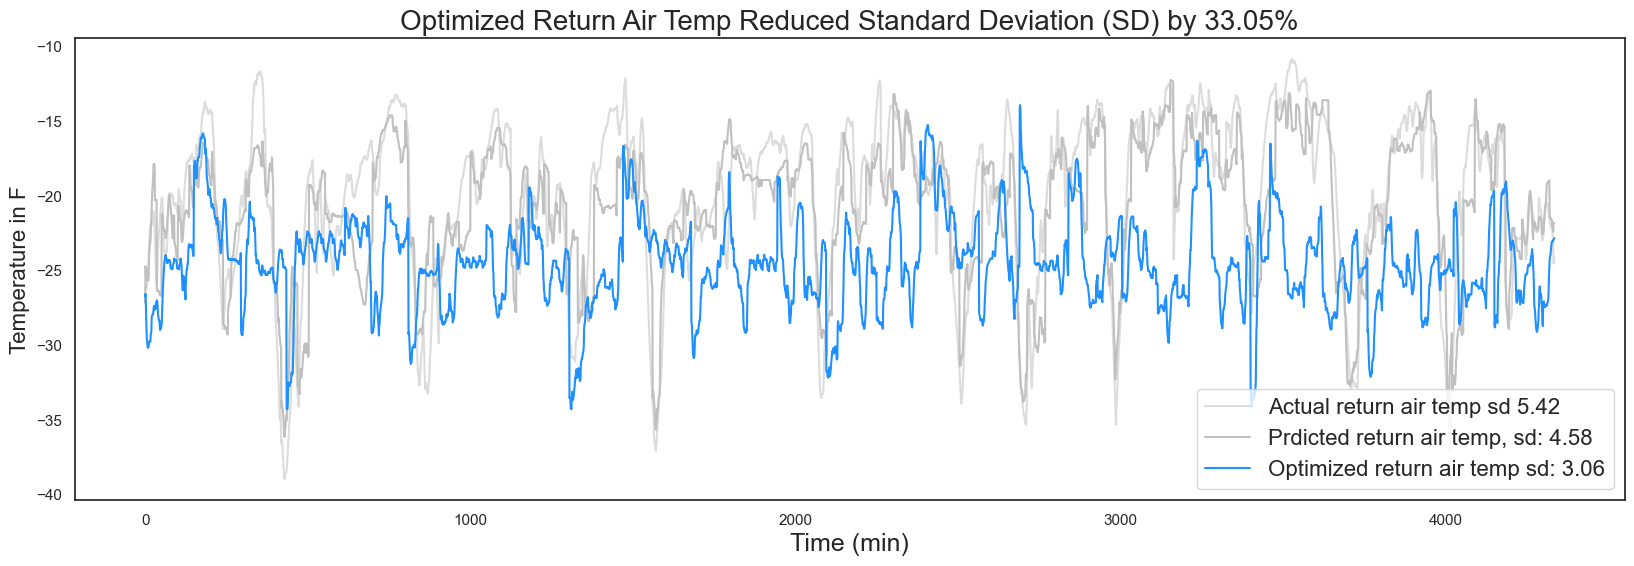

In [111]:
from random import randint
sns.set_style("white")

pyplot.figure(figsize=(20,6))
pyplot.plot(list(y_test)[0:len(l)], color='gainsboro', label=f'Actual return air temp sd {sd_2:.2f}')

pyplot.plot(list(xgb_preds)[0:len(l)],color='silver',  label=f'Prdicted return air temp, sd: {sd_0:.2f}')

pyplot.plot(l,color='dodgerblue', label=f'Optimized return air temp sd: {sd_1:.2f}')
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Temperature in F', fontsize=16)
plt.title(f'Optimized Return Air Temp Reduced Standard Deviation (SD) by {percent_reduction}%',fontsize = 20)
plt.rc('legend', fontsize = 16)
pyplot.legend()
pyplot.show()

## Get decisions:

In [95]:
d = []
dates = np.unique([i.strftime('%m/%d/%Y') for i in X_test.index.date])
#dates = ['2023-05-01']
for date in dates:
    for n in range(0,6):
        time = pd.to_datetime(f"{date} 07:30:00.000") + timedelta(hours=n*2.5)
        
        d = d + sorted([i[:6] for (i,j) in list(solutions[time].keys())], key=lambda x: x[-1])
        

In [107]:
sum([i[-1] for i in d])

4335

In [108]:
d

[(0.0, 0.0, 0.0, 0.0, 1.0, 5),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 1.0, 0.0, 0.0, 35),
 (1.0, 0.0, 0.0, 0.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 0.0, 1.0, 10),
 (0.0, 0.0, 0.0, 0.0, 1.0, 10),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 0.0, 1.0, 0.0, 35),
 (1.0, 0.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 1.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 0.0, 1.0, 5),
 (0.0, 0.0, 0.0, 0.0, 1.0, 10),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (1.0, 0.0, 0.0, 0.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 1.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 0.0, 1.0, 5),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 1.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 0.0, 1.0, 20),
 (0.0, 0.0, 0.0, 1.0, 0.0, 35),
 (0.0, 0.0, 1.0, 0.0, 0.0, 35),
 (1.0, 0.0, 0.0, 0.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 1.0, 0.0, 0.0, 0.0, 35),
 (0.0, 0.0, 0.0, 0.0, 1.0, 5),
 (0.0, 0.0, 

## covert decisions into time sequence, n is which col, ex. 0 == A

In [97]:
from itertools import repeat

def convert_to_timeSequence(instruction_list,n):
    coil_instr = []
    for i in instruction_list:
        if np.argmax(i[:5]) == n:
            if np.argmax(i) != 4:
                coil_instr = coil_instr + list(repeat(1, 35))
            else:
                coil_instr = coil_instr + list(repeat(1, i[5]))
        elif np.argmax(i) == 4:
            coil_instr = coil_instr + list(repeat(0, i[5])) 
        else:
            coil_instr = coil_instr + list(repeat(0, 35))
        
    return coil_instr

In [98]:
CoilA_instructions = convert_to_timeSequence(d,0)
CoilB_instructions = convert_to_timeSequence(d,1)
CoilC_instructions = convert_to_timeSequence(d,2)
CoilD_instructions = convert_to_timeSequence(d,3)
NoDefrost_instructions = convert_to_timeSequence(d,4)

In [99]:
CoilA_instructions = count_continuous_ones(CoilA_instructions)
CoilB_instructions = count_continuous_ones(CoilB_instructions)
CoilC_instructions = count_continuous_ones(CoilC_instructions)
CoilD_instructions = count_continuous_ones(CoilD_instructions)
NoDefrost_instructions = count_continuous_ones(NoDefrost_instructions)

In [100]:
X_test_orig.columns

Index(['ReturnAir_Temp', 'CoilA_Defrost', 'CoilB_Defrost', 'CoilC_Defrost',
       'CoilD_Defrost', 'No_Defrost', 'ReturnAir_Temp_at_Defrost_Begin',
       'timeOfDay', 'pres_hr', 'rhum_hr', 'temp_hr', 'prcp_hr', 'wdir_hr',
       'wspd_hr'],
      dtype='object')

In [101]:
split_date="04-30-2023"
X_test_orig=df.loc[df.index > split_date].copy()
ReturnAir_Temp = list(X_test_orig['ReturnAir_Temp'])
CoilA_Defrost = list(X_test_orig['CoilA_Defrost'])
CoilB_Defrost = list(X_test_orig['CoilB_Defrost'])
CoilC_Defrost = list(X_test_orig['CoilC_Defrost'])
CoilD_Defrost = list(X_test_orig['CoilD_Defrost'])
No_Defrost = list(X_test_orig['No_Defrost'])

In [102]:
df_instructions = pd.DataFrame(list(zip(ReturnAir_Temp,l,CoilA_instructions, CoilB_instructions,CoilC_instructions,CoilD_instructions,NoDefrost_instructions,
                                        CoilA_Defrost,CoilB_Defrost,CoilC_Defrost,CoilD_Defrost,No_Defrost)),
                                columns =['ReturnAir_Temp','Optimized_ReturnAir_Temp','CoilA_instructions', 'CoilB_instructions','CoilC_instructions','CoilD_instructions','NoDefrost_instructions',
                                         'CoilA_Defrost','CoilB_Defrost','CoilC_Defrost','CoilD_Defrost','No_Defrost'])

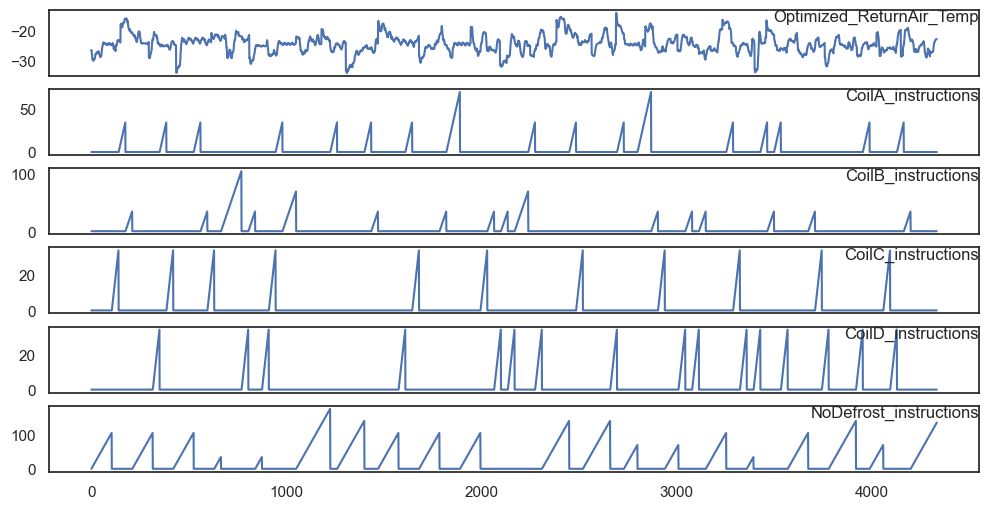

In [103]:
values = df_instructions.values
# specify columns to plot
#3,5
groups = [1,2,3,4,5,6]
i = 1
# plot each column
pyplot.figure(figsize=(12,6))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df_instructions.columns[group], y=0.7, loc='right',size = 12)
    i += 1

pyplot.show()

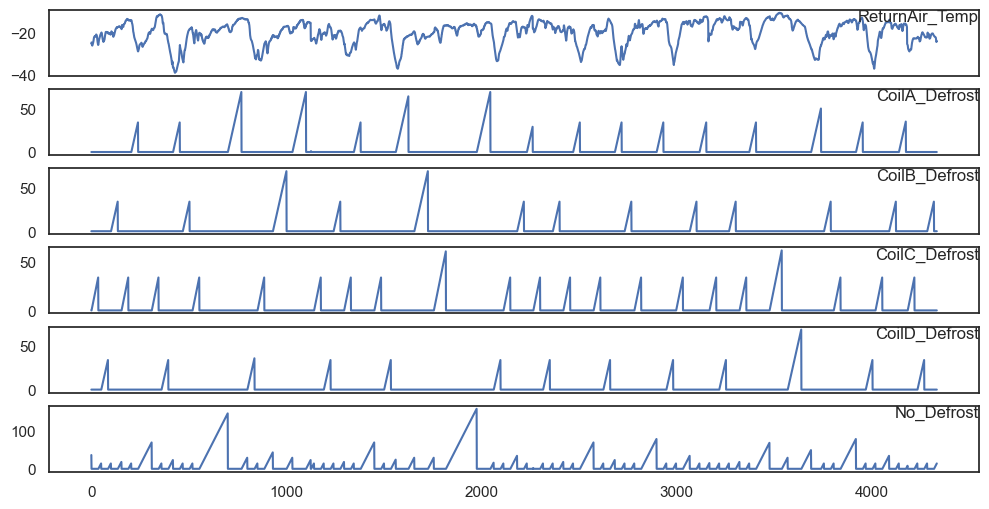

In [112]:
values = df_instructions.values
# specify columns to plot
#3,5
groups = [0,7,8,9,10,11]
i = 1
# plot each column
pyplot.figure(figsize=(12,6))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df_instructions.columns[group], y=0.7, loc='right',size = 12)
    i += 1

pyplot.show()

In [106]:
len(X_test_orig)

5082